In [117]:
# Import libaries
import re
import importlib


In [118]:
# Libary to import self-made libaries
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway\Libaries')

In [148]:
# Importing self-made libaries
import standards as s
import Monte_Carlo as MC
import life_cycle_assessment as lc
import LCA_plots as lp
import box_plot as bp

# Reload to reset the state of the self-made libaries
# https://dev.to/fronkan/importlib-reload-for-resting-modules-between-tests-neh
importlib.reload(s)
importlib.reload(MC)
importlib.reload(lc)
importlib.reload(lp)
importlib.reload(bp)

<module 'box_plot' from 'C:\\Users\\ruw\\Desktop\\RA\\Single-use-vs-multi-use-in-health-care\\Brighway\\Libaries\\box_plot.py'>

In [120]:
# Specifying if it is CONSQ (consequential) or APOS
db_type = 'APOS'

# Specifying the LCIA method
lcia_method = 'recipe'


In [121]:

# Path to where the code is stored
path = r'C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Brighway'

file_identifier = 'Ananas'
res_folder_identifier = 'Ofir'

# Specifying the file name and sheet name
file_name = f'{path}\Results\{file_identifier} - {db_type}_{lcia_method}.xlsx'
sheet_name = f'{file_identifier}'

# Creating the saving directory for the results
save_dir = s.results_folder(path, 'Results', res_folder_identifier)

# Let the use decide the project and database
database_project, database_name = lc.select_project_and_database()

# Creating the flow legend
flow_legend = ['H2R',
               'H2S',
               'ASC',
               'ASW',
               'H4R',
               'H4S',
               'ALC',
               'ALW'
               ]



Folder name Results created
The chosen project is SU_vs_MU and the chosen database is sterilization


In [122]:
flows = lc.get_database_type_flows(database_project, database_name, db_type)

flows

['H200 REC - APOS',
 'H200 SU - APOS',
 'H400 REC - APOS',
 'H400 SU - APOS',
 'alubox large + washer - APOS',
 'alubox large + wipe - APOS',
 'alubox small + washer - APOS',
 'alubox small + wipe - APOS']

In [123]:
# flows = lc.get_user_specific_flows(database_project, database_name)
# flows

In [124]:
initialization = [database_project, database_name, flows, lcia_method, db_type]
file_name_unique = f'{path}\Results\{file_identifier} - {db_type}_{lcia_method}_unq.xlsx'

In [127]:
df, plot_x_axis_all, impact_categories = lc.quick_LCIA(initialization, file_name, file_name_unique, sheet_name)

Recipe is selected
Initialization is completed
Calculating the results for acidification: terrestrial
Calculation 1/462: 'PE incineration no Energy Recovery - APOS' (kilogram, CH, None),  Score: -0.00019338600123982092 for col 0, row 0
Calculation 2/462: 'PP incineration no Energy Recovery - APOS' (kilogram, CH, None),  Score: -0.00016461213347384479 for col 0, row 1
Calculation 3/462: 'alubox EoL melting - APOS' (kilogram, GLO, None),  Score: 0.006490748653039479 for col 0, row 2
Calculation 4/462: 'alubox production - APOS' (kilogram, GLO, None),  Score: 0.008734348347380119 for col 0, row 3
Calculation 5/462: 'alubox raw materials - APOS' (kilogram, GLO, None),  Score: 0.06467968742789991 for col 0, row 4
Calculation 6/462: 'autoclave - APOS' (unit, GLO, None),  Score: 0.020389694915318824 for col 0, row 5
Calculation 7/462: 'avoided alubox raw materials - APOS' (kilogram, GLO, None),  Score: -0.06467968742789991 for col 0, row 6
Calculation 8/462: 'cabinet washer - APOS' (unit, GLO

In [128]:
df

,"(ReCiPe 2016 v1.03, midpoint (H), acidification: terrestrial, terrestrial acidification potential (TAP))","(ReCiPe 2016 v1.03, midpoint (H), climate change, global warming potential (GWP1000))","(ReCiPe 2016 v1.03, midpoint (H), ecotoxicity: freshwater, freshwater ecotoxicity potential (FETP))","(ReCiPe 2016 v1.03, midpoint (H), ecotoxicity: marine, marine ecotoxicity potential (METP))","(ReCiPe 2016 v1.03, midpoint (H), ecotoxicity: terrestrial, terrestrial ecotoxicity potential (TETP))","(ReCiPe 2016 v1.03, midpoint (H), energy resources: non-renewable, fossil, fossil fuel potential (FFP))","(ReCiPe 2016 v1.03, midpoint (H), eutrophication: freshwater, freshwater eutrophication potential (FEP))","(ReCiPe 2016 v1.03, midpoint (H), eutrophication: marine, marine eutrophication potential (MEP))","(ReCiPe 2016 v1.03, midpoint (H), human toxicity: carcinogenic, human toxicity potential (HTPc))","(ReCiPe 2016 v1.03, midpoint (H), human toxicity: non-carcinogenic, human toxicity potential (HTPnc))",...,"(ReCiPe 2016 v1.03, midpoint (H), land use, agricultural land occupation (LOP))","(ReCiPe 2016 v1.03, midpoint (H), material resources: metals/minerals, surplus ore potential (SOP))","(ReCiPe 2016 v1.03, midpoint (H), ozone depletion, ozone depletion potential (ODPinfinite))","(ReCiPe 2016 v1.03, midpoint (H), particulate matter formation, particulate matter formation potential (PMFP))","(ReCiPe 2016 v1.03, midpoint (H), photochemical oxidant formation: human health, photochemical oxidant formation potential: humans (HOFP))","(ReCiPe 2016 v1.03, midpoint (H), photochemical oxidant formation: terrestrial ecosystems, photochemical oxidant formation potential: ecosystems (EOFP))","(ReCiPe 2016 v1.03, midpoint (H), water use, water consumption potential (WCP))","(ReCiPe 2016 v1.03, endpoint (H), total: ecosystem quality, ecosystem quality)","(ReCiPe 2016 v1.03, endpoint (H), total: human health, human health)","(ReCiPe 2016 v1.03, endpoint (H), total: natural resources, natural resources)"
H200 REC - APOS,"[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...",...,"[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog..."
H200 SU - APOS,"[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...",...,"[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polypropylene, granulate' (kilog...","[['market for polyp

In [130]:
rearrange = True
df_rearranged = lc.rearrange_dataframe_index(rearrange, df)

In [131]:
if 'recipe' in lcia_method:
    df_res, df_endpoint = lc.recipe_dataframe_split(df_rearranged)
    plot_x_axis_end = plot_x_axis_all[-3:]
    ic_mid = plot_x_axis_all[:-3] 
    plot_x_axis = []
    for ic in ic_mid:
        # print(ic)
        string = re.findall(r'\((.*?)\)', ic)
        plot_x_axis.append(string[0])

else:
    df_res = df_rearranged
    plot_x_axis = plot_x_axis_all


In [132]:
# if calculate_cont == True:
#     sub_proccess, amount = lc.obtaining_sub_process(sub_product_details)
#     FU_sub, FU_sub_process, idx = lc.sub_process_initilization(sub_proccess, FU, database_project, f'df_idx_ofir_{db_type}', lcia_method, db_type)
#     flow_count, flow_sub, functional_unit_sub = lc.FU_contibution_initilization(FU_sub, FU_sub_process)
#     fu_sub_updated = lc.process_update(FU, functional_unit_sub)
    
#     df_cont = lc.LCIA_contribution(impact_category[1], flow_count, FU_sub_process, fu_sub_updated, amount, idx)
#     lc.save_LCA_results(df_cont, file_cont_name, sheet_name, impact_category)
#     df_c = lc.import_LCA_results(file_cont_name, idx, impact_category[1])


In [133]:
df_tot, df_scaled = lc.dataframe_element_scaling(df_res)
df_col = [df_res.columns[1]]
df_GWP = df_res[df_col]

unique_elements = lc.unique_elements_list(database_name)
colors = s.plot_colors(unique_elements,'turbo')


inputs = [flow_legend, colors, save_dir, db_type, database_name]

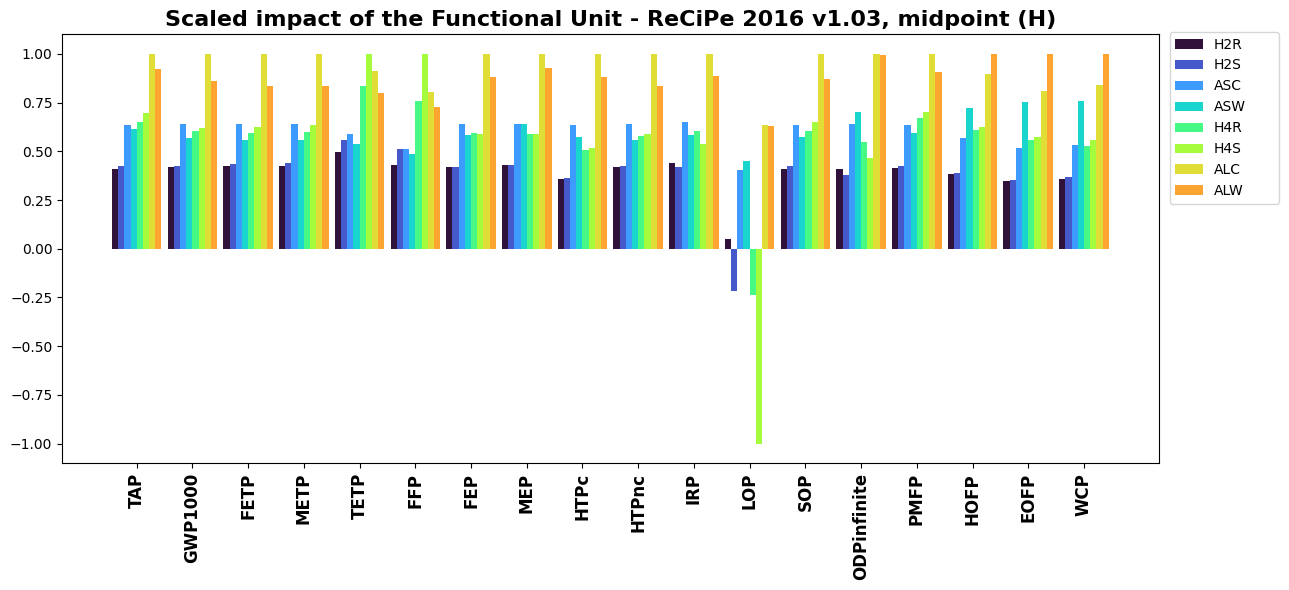

In [134]:
leg_pos_mid = .605

lp.scaled_FU_plot(df_scaled, plot_x_axis, inputs, impact_categories, leg_pos_mid)

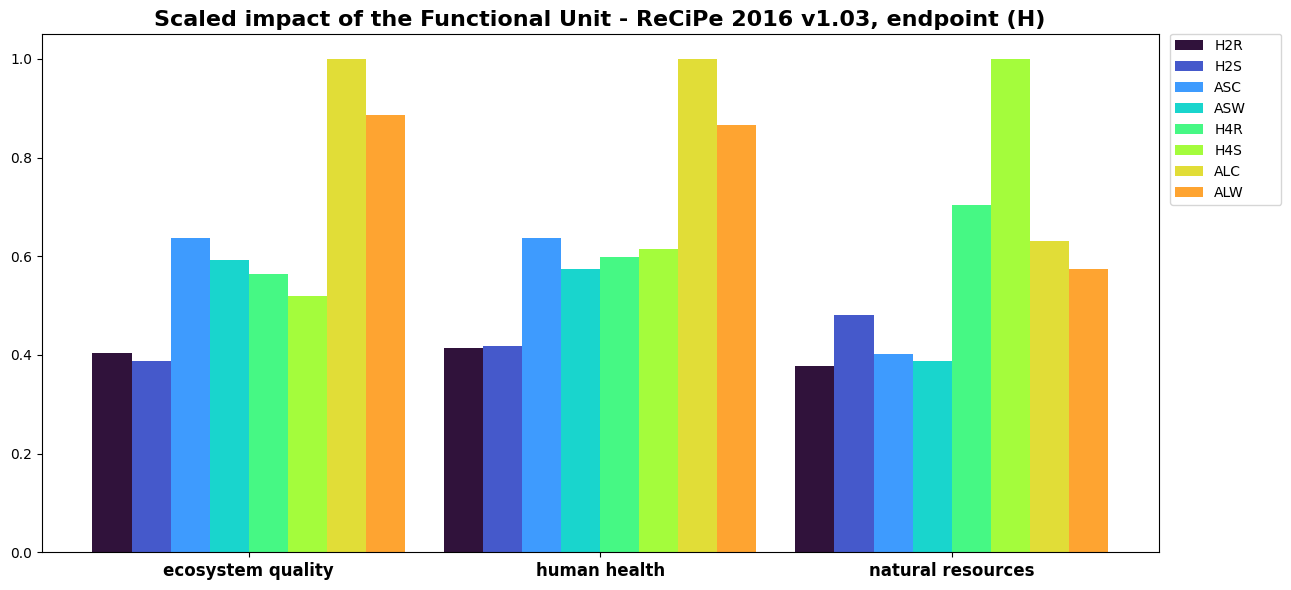

In [135]:
leg_pos_end = 0.67
if 'recipe' in lcia_method.lower():
    df_tot_e, df_scaled_e = lc.dataframe_element_scaling(df_endpoint)
    lp.scaled_FU_plot(df_scaled_e, plot_x_axis_end, inputs, impact_categories[-3:], leg_pos_end)


In [136]:
if 'recipe' not in lcia_method:
    directory = 'C:\\Users\\ruw\\Desktop\\RA\\'
    lp.single_score_plot(directory, df_tot, colors, flow_legend, save_dir, db_type)

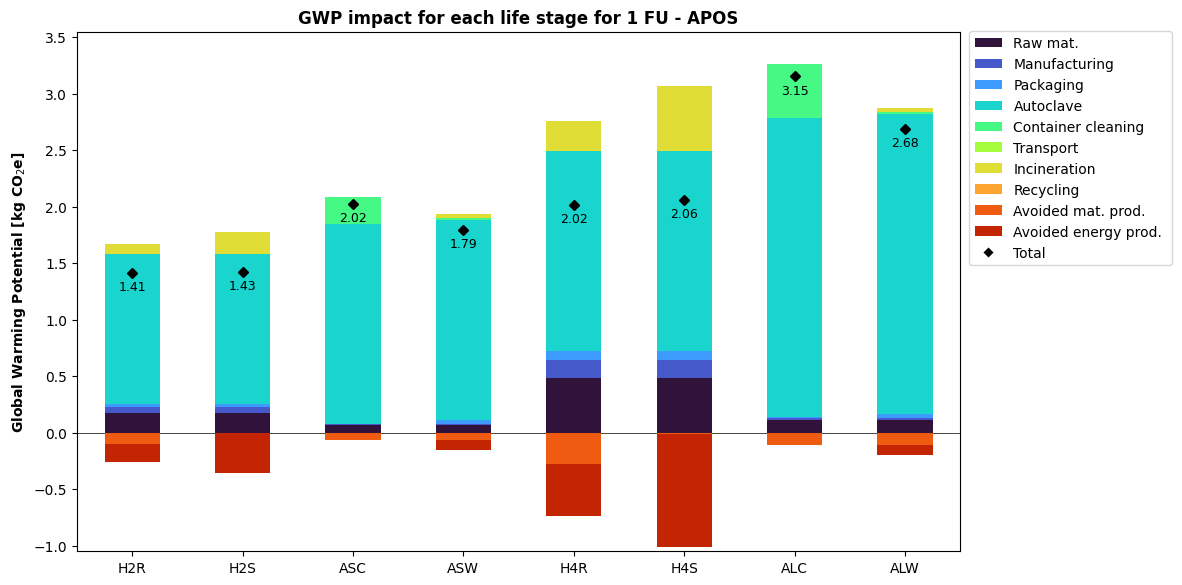

In [150]:

y_min = -1
y_max = 3.5
step = 0.5
leg_pos = 0.55
marker_offset = 0.18
y_axis_values = [y_min, y_max, step, leg_pos, marker_offset]
df_stacked = lp.gwp_scenario_plot(df_GWP, inputs, y_axis_values)


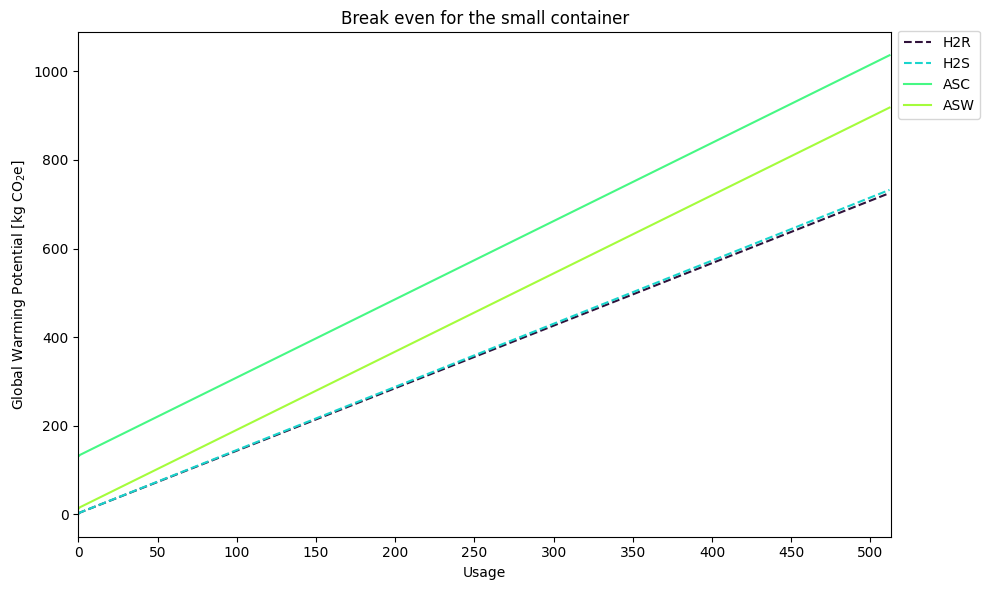

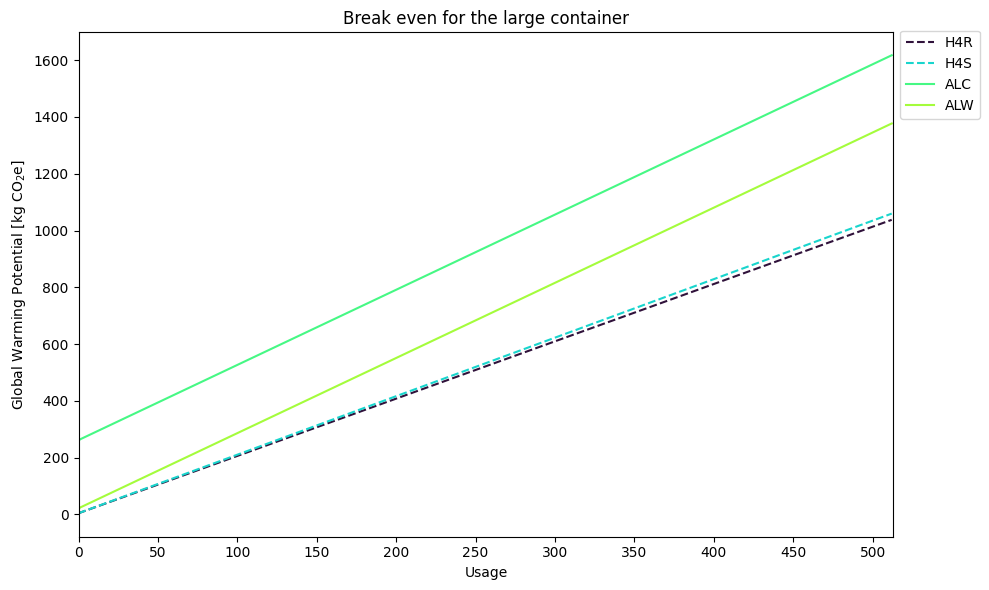

In [138]:
amount_of_uses = 513
lp.break_even_graph(df_stacked, inputs, amount_of_uses)

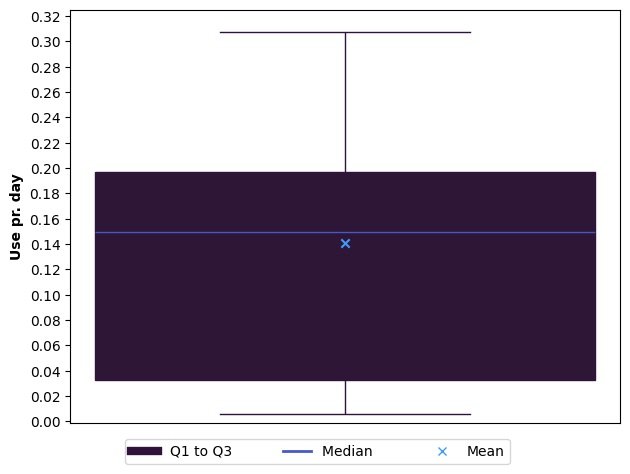

In [169]:
color_Q1_Q3 = 0
color_median = 1
color_mean = 2
plot_label = 'Use pr. day'
save_name = 'alu_container'
leg_size = 0.7
y_min = 0
y_max = 0.32
ystep = 0.02

path_box_plot = r"C:\Users\ruw\Desktop\RA\Single-use-vs-multi-use-in-health-care\Single-use-vs-multi-use-in-health-care\Data\container.xlsx"

plot_structure = [color_Q1_Q3, color_median, color_mean, plot_label, save_name, leg_size, y_min, y_max, ystep]

bp.box_plot(path_box_plot, inputs, plot_structure)